In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel(r"C:\Users\George\Documents\Football Analytics\Data\xG Flow Test.xlsx", index_col=0)

In [12]:
df

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor
0,2696028051,Goal,8570,1152455,Wirtz,82.483618,48.284940,10,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 0.21329365079365015, 'y': 0.074742411216...",False,False,Florian,Wirtz,Florian Wirtz,#464646
1,2696028913,Goal,8570,1156141,Musiala,87.420000,53.451488,19,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 0.47552910052910013, 'y': 0.548677245978...",False,True,Jamal,Musiala,Jamal Musiala,#464646
2,2696029565,AttemptSaved,8570,749736,Havertz,81.777235,47.723359,28,NaN,False,...,FreeKick,FirstHalf,False,"{'x': 0.2536375661375645, 'y': 0.1291005284656...",False,False,Kai,Havertz,Kai Havertz,#464646
3,2696030523,AttemptSaved,8570,178818,Gündogan,91.897368,46.487880,42,NaN,False,...,RegularPlay,FirstHalf,False,"{'x': 0.5763888888888888, 'y': 0.0220829851322...",False,True,Ilkay,Gündogan,Ilkay Gündogan,#464646
4,2696030659,Goal,8570,749736,Havertz,88.360000,50.082000,45,1.0,False,...,Penalty,FirstHalf,False,"{'x': 0.5562169312169307, 'y': 0.2361180717989...",False,True,Kai,Havertz,Kai Havertz,#464646
5,2696031019,AttemptSaved,8570,276738,Rüdiger,68.643272,46.038615,51,NaN,False,...,RegularPlay,SecondHalf,False,"{'x': 0.21329365079365015, 'y': 0.183458645714...",False,False,Antonio,Rüdiger,Antonio Rüdiger,#464646
6,2696031053,AttemptSaved,8570,276738,Rüdiger,87.796000,46.038615,52,NaN,True,...,FromCorner,SecondHalf,False,"{'x': 0.5360449735449745, 'y': 0.3227513211640...",False,True,Antonio,Rüdiger,Antonio Rüdiger,#464646
7,2696031251,AttemptSaved,8570,167008,Gross,79.441408,68.218852,57,NaN,True,...,FromCorner,SecondHalf,False,"{'x': 1.4034391534391548, 'y': 0.3227513211640...",False,False,Pascal,Gross,Pascal Gross,#464646
8,2696031263,AttemptSaved,8570,460632,Kimmich,78.488631,33.906021,57,NaN,True,...,FromCorner,SecondHalf,False,"{'x': 0.5965608465608451, 'y': 0.3227513211640...",False,False,Joshua,Kimmich,Joshua Kimmich,#464646
9,2696031295,Miss,8570,1152455,Wirtz,91.897368,40.676194,58,NaN,False,...,RegularPlay,SecondHalf,False,"{'x': 1.3266450399269785, 'y': 0.6772486772486...",False,True,Florian,Wirtz,Florian Wirtz,#464646


In [14]:
df_home = df[df.teamId == 8570].reset_index(drop=True)
df_away = df[df.teamId == 8498].reset_index(drop=True)

In [15]:
home_own_goals = []
for x in df_home.index:
    if df_home['isOwnGoal'][x] == True:
        home_own_goals.append(df_home.iloc[x])
        df_home.drop(x, axis=0, inplace=True)
    else:
        pass

away_own_goals = []
for x in df_away.index:
    if df_away['isOwnGoal'][x] == True:
        away_own_goals.append(df_away.iloc[x])
        df_away.drop(x, axis=0, inplace=True)
    else:
        pass

df_home_own_goals = pd.DataFrame(home_own_goals)
df_away_own_goals = pd.DataFrame(away_own_goals)
df_home = pd.concat([df_home, df_away_own_goals], ignore_index=True)
df_away = pd.concat([df_away, df_home_own_goals], ignore_index=True)
df_home = df_home.sort_values(by='min', ascending=True)
df_away = df_away.sort_values(by='min', ascending=True)
df_home.reset_index(inplace=True, drop=True)
df_away.reset_index(inplace=True, drop=True)
df_home.fillna(0, inplace=True)
df_away.fillna(0, inplace=True)

In [16]:
first_half_added_time = 3
second_half_added_time = 3

In [17]:
a_xG = [0]
h_xG = [0]

a_min = [0]
h_min = [0]


for x in range(len(df_home)):
    if df_home['period'][x] == 'FirstHalf':
        h_xG.append(df_home['expectedGoals'][x])
        h_min.append(df_home['min'][x] + df_home['minAdded'][x])
        
    if df_home['period'][x] == 'SecondHalf':
        h_xG.append(df_home['expectedGoals'][x])
        h_min.append(df_home['min'][x] + df_home['minAdded'][x] + first_half_added_time)
      

for x in range(len(df_away)):
    if df_away['period'][x] == 'FirstHalf':
        a_xG.append(df_away['expectedGoals'][x])
        a_min.append(df_away['min'][x] + df_away['minAdded'][x])

    if df_away['period'][x] == 'SecondHalf':
        a_xG.append(df_away['expectedGoals'][x])
        a_min.append(df_away['min'][x] + df_away['minAdded'][x] + first_half_added_time)
    

In [18]:
h_min

[0,
 10.0,
 19.0,
 28.0,
 42.0,
 46.0,
 54.0,
 55.0,
 60.0,
 60.0,
 61.0,
 62.0,
 63.0,
 63.0,
 66.0,
 69.0,
 71.0,
 83.0,
 86.0,
 89.0,
 96.0]

In [19]:
def nums_cum_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]
a_cumulative = nums_cum_sum(a_xG)
h_cumulative = nums_cum_sum(h_xG)

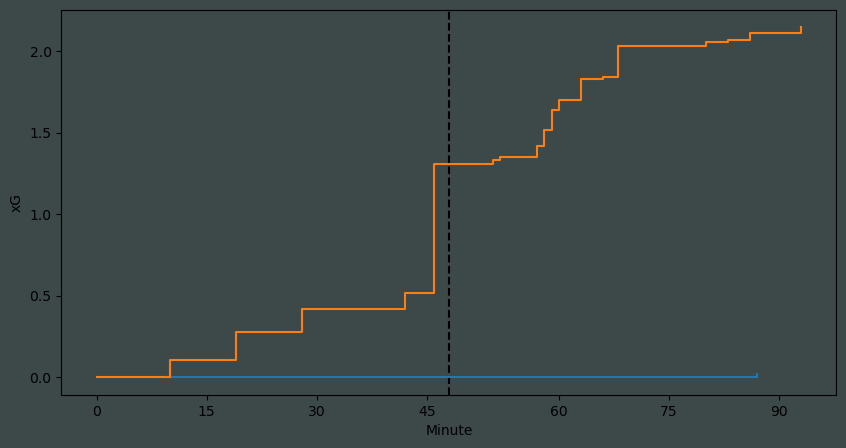

In [22]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute')
plt.ylabel('xG')
plt.axvline(x=45+first_half_added_time, color='black', linestyle='--', label='Half Time')
plt.xticks([0,15,30,45,60+first_half_added_time,75+first_half_added_time,90+first_half_added_time], ['0','15','30','45','60','75','90'])

ax.step(x=a_min, y=a_cumulative, where = 'post')
ax.step(x=h_min, y=h_cumulative, where = 'post')
